<a href="https://colab.research.google.com/github/midhunkrishnam/Machine-Learning-Algoritnms/blob/main/Agglomerative_HierarchicalClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/Wholesale customers data (1).csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561.0,214.0,2674.0,1338.0
1,2,3,7057,9810,9568.0,1762.0,3293.0,1776.0
2,2,3,6353,8808,7684.0,2405.0,3516.0,7844.0
3,1,3,13265,1196,4221.0,6404.0,507.0,1788.0
4,2,3,22615,5410,7198.0,3915.0,1777.0,5185.0
...,...,...,...,...,...,...,...,...
411,1,3,3,12051,16027.0,13135.0,182.0,2204.0
412,1,3,39228,1431,764.0,4510.0,93.0,2346.0
413,2,3,14531,15488,30243.0,437.0,14841.0,1867.0
414,1,3,10290,1981,2232.0,1038.0,168.0,2125.0


In [ ]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             1
Frozen              1
Detergents_Paper    3
Delicassen          2
dtype: int64

In [ ]:
for i in df.columns:
   df[i].fillna(df[i].mode()[0],inplace=True)

# or
#df['Grocery']=df['Grocery'].fillna(df['Grocery'].mean())
#df['Frozen']=df['Frozen'].fillna(df['Frozen'].mean())
#df['Detergents_Paper']=df['Detergents_Paper'].fillna(df['Detergents_Paper'].mean())
#df['Delicassen']=df['Delicassen'].fillna(df['Delicassen'].mean())

In [ ]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [ ]:
from sklearn.preprocessing import normalize
data_scaled=normalize(df)
data_scaled=pd.DataFrame(data_scaled,columns=df.columns)
data_scaled

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,0.000112,0.000168,0.708333,0.539874,0.422741,0.011965,0.149505,0.074809
1,0.000125,0.000188,0.442198,0.614704,0.599540,0.110409,0.206342,0.111286
2,0.000125,0.000187,0.396552,0.549792,0.479632,0.150119,0.219467,0.489619
3,0.000065,0.000194,0.856837,0.077254,0.272650,0.413659,0.032749,0.115494
4,0.000079,0.000119,0.895416,0.214203,0.284997,0.155010,0.070358,0.205294
...,...,...,...,...,...,...,...,...
411,0.000042,0.000125,0.000125,0.500602,0.665766,0.545632,0.007560,0.091555
412,0.000025,0.000076,0.990872,0.036146,0.019298,0.113919,0.002349,0.059258
413,0.000050,0.000075,0.364462,0.388465,0.758545,0.010961,0.372237,0.046827
414,0.000091,0.000273,0.937737,0.180530,0.203404,0.094594,0.015310,0.193653


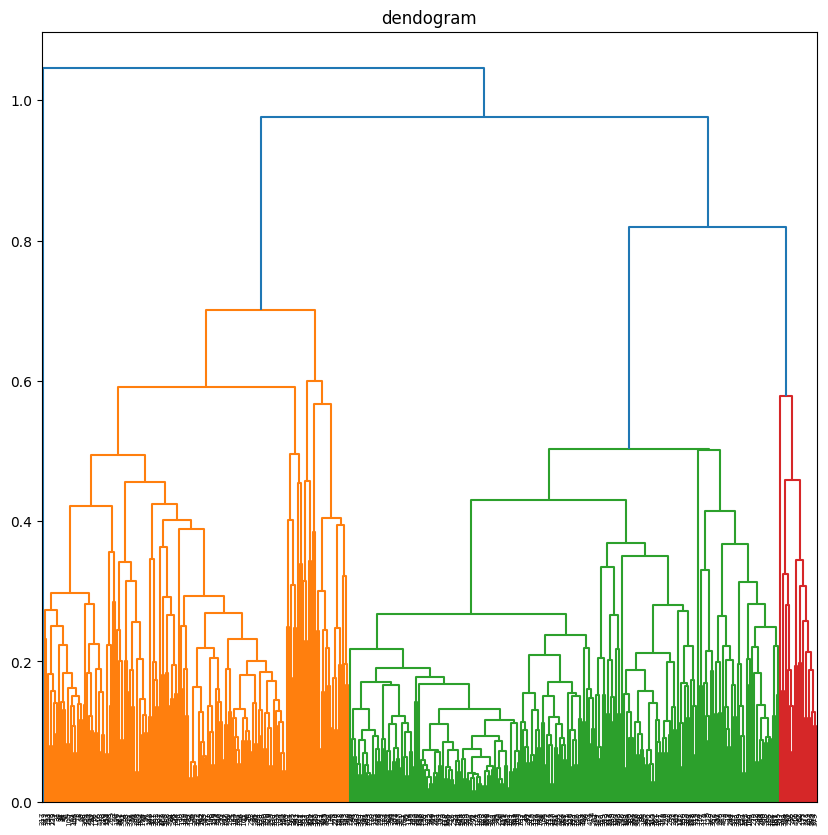

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title("dendogram")
dend=shc.dendrogram(shc.linkage(data_scaled,method='average'))

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='complete')
y=cluster.fit_predict(data_scaled)
y

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0,

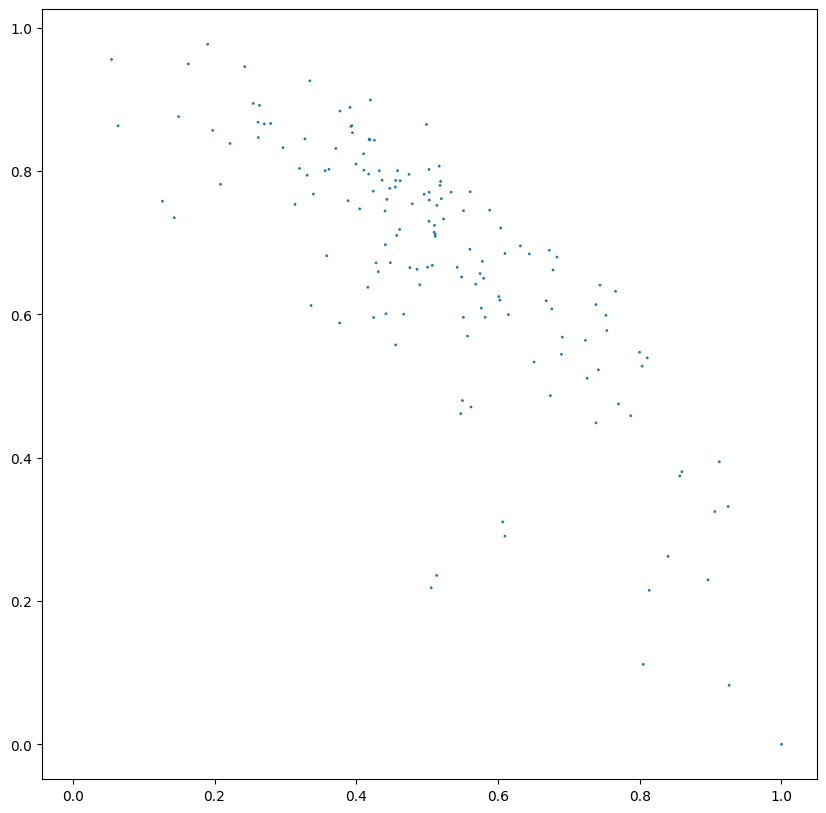

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.scatter(data_scaled["Milk"],data_scaled["Grocery"],cluster.labels_)
